# Семинар 9 ДЗ

## Задача $1$
Даны значения величины заработной платы заемщиков банка $(zp)$ и значения их поведенческого кредитного скоринга $(ks)$:<br> 

$zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],$ <br>
$ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. $

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за 

$X$ заработную плату (то есть, $zp$ - признак), а за 

$y$ - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.


## Решение

Используем модель следующего вида:

$\hat{y}=b_0 + b_1 \cdot x$

Расчет коэффициентов производится в таком случае следующим формулам:

$b_1= \dfrac{n \cdot \sum_{i=1}^n x_i \cdot y_i - (\sum_{i=1}^n x_i)(\sum_{i=1}^n y_i)}{n \cdot \sum_{i=1}^n x_i^2-(\sum_{i=1}^n x_i)^2}$

$b_0= \bar y - b \cdot \bar x$

$\bar x = \dfrac{\sum_{i=1}^n x_i}{n}$

$\bar y = \dfrac{\sum_{i=1}^n y_i}{n}$

Сделаем эти вычисление ниже в Python. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(zp)

b1 = (n * np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(n * np.sum(zp**2 ) - np.sum(zp)**2)
b0 = np.mean(ks) - b1 * np.mean(zp)

print(f"При использовании 1-го способа b1 = {b1}, b0 = {b0}")

# Второй способ

b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b0 = np.mean(ks) - b1 * np.mean(zp)

print(f"При использовании 2-го способа b1 = {b1}, b0 = {b0}")

ks_pred1 = b1 * zp + b0
ks_pred1

При использовании 1-го способа b1 = 2.6205388824027653, b0 = 444.17735732435955
При использовании 2-го способа b1 = 2.620538882402765, b0 = 444.1773573243596


array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Используем матричный метод расчета коэффициентов, для нахождения модели без использования intercept

In [51]:
x = zp.reshape((n,1))
y = ks.reshape((n,1))

B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)[0][0]

ks_pred2 = B * zp
B, ks_pred2

(5.889820420132688,
 array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
         235.59281681,  412.28742941,  318.05030269,  883.47306302,
         706.77845042,  647.88024621]))

Используем матричный метод расчета коэффициентов, для нахождения модели c использованием intercept и сравним с использованием формул

In [46]:
x = zp.reshape((n,1))
y = ks.reshape((n,1))

x = np.hstack([np.ones((n, 1)), x])

BI = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
BI

array([[444.17735732],
       [  2.62053888]])

Решения идентичны

Найдем корреляцию и построим графики данных и наших моделей

<function matplotlib.pyplot.show(close=None, block=None)>

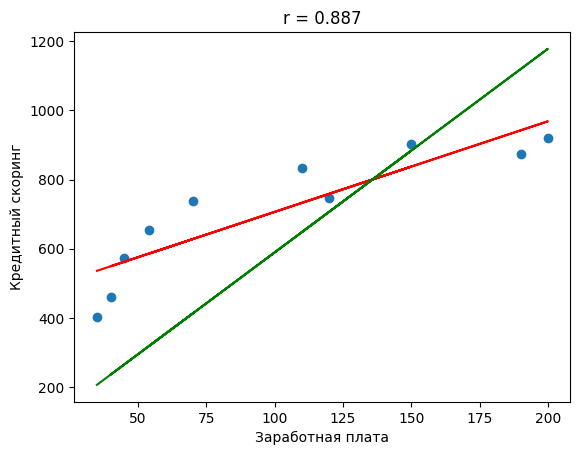

In [28]:
r = np.corrcoef(zp, ks)
plt.scatter(zp, ks)
plt.title(f"r = {round(r[0][1], 3)}")
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.plot(zp, b1 * zp + b0, "r")
plt.plot(zp, B * zp, "g")
plt.show

На графике мы однозначно видим что использование intercept предпочтительнее. Проверим при помощи функции потерь по формуле:

$mse = \dfrac {\sum(y - y_{pred})^2}{n}$

In [52]:
mse1 = ((ks - ks_pred1)**2).sum()/n
mse2 = ((ks - ks_pred2)**2).sum()/n
mse1, mse2

(6470.414201176658, 56516.8584157194)

Первое значение (с использованием интерсепта) существенно меньше, что и требовалось доказать!

## Задача $2$
Посчитать коэффициент линейной регрессии при заработной плате $(zp)$, используя градиентный спуск (без intercept).


## Решение

## Задача $3$ (Дополнительно)
Произвести вычисления как в пункте $2$, но с вычислением intercept. 

Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).